import


In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Create dataset

In [55]:
dataset = pd.read_csv("train.csv")


In [56]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

check for any empty columns

In [57]:
dataset.isnull().sum()

,0
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,259
LotArea,0
...,...
MoSold,0
YrSold,0
SaleType,0
SaleCondition,0


Clean Data

In [58]:
dataset['LotFrontage'] = dataset['LotFrontage'].fillna(dataset['LotFrontage'].median())

In [59]:
dataset.isnull().sum()

,0
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,0
LotArea,0
...,...
MoSold,0
YrSold,0
SaleType,0
SaleCondition,0


In [60]:
dataset.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,69.863699,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,22.027677,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Plot data to lok for outliers

In [61]:
dataset = dataset[~(dataset['GrLivArea'] > 4000) & (dataset['SalePrice'] < 300000)]

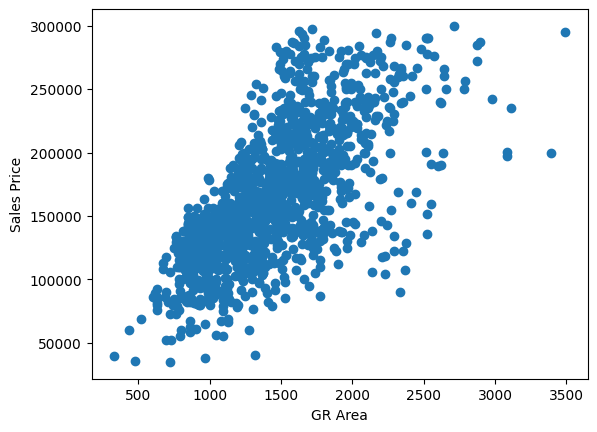

In [62]:
plt.scatter(dataset['GrLivArea'], dataset['SalePrice'])
plt.xlabel("GR Area")
plt.ylabel("Sales Price")
plt.show()

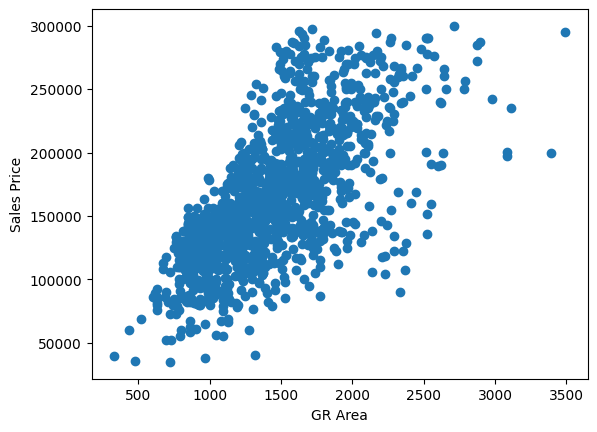

In [63]:
plt.scatter(dataset['GrLivArea'], dataset['SalePrice'])
plt.xlabel("GR Area")
plt.ylabel("Sales Price")
plt.show()

In [64]:
dataset['SalePrice'].describe()

,SalePrice
count,1343.000000
mean,164234.084885
std,52130.339652
min,34900.000000
25%,128000.000000
50%,156000.000000
75%,196000.000000
max,299800.000000


log transorm on the y(sales price)

In [65]:
dataset['SalePrice'] = np.log(dataset['SalePrice'])

In [66]:
dataset['SalePrice'].describe()

,SalePrice
count,1343.000000
mean,11.956084
std,0.334424
min,10.460242
25%,11.759786
50%,11.957611
75%,12.185870
max,12.610871


Split data

In [68]:
X = dataset.drop(columns=['SalePrice', 'Id'])
y = dataset['SalePrice']

In [69]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = .2, random_state = 1)




In [67]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1343 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1343 non-null   int64  
 1   MSSubClass     1343 non-null   int64  
 2   MSZoning       1343 non-null   object 
 3   LotFrontage    1343 non-null   float64
 4   LotArea        1343 non-null   int64  
 5   Street         1343 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1343 non-null   object 
 8   LandContour    1343 non-null   object 
 9   Utilities      1343 non-null   object 
 10  LotConfig      1343 non-null   object 
 11  LandSlope      1343 non-null   object 
 12  Neighborhood   1343 non-null   object 
 13  Condition1     1343 non-null   object 
 14  Condition2     1343 non-null   object 
 15  BldgType       1343 non-null   object 
 16  HouseStyle     1343 non-null   object 
 17  OverallQual    1343 non-null   int64  
 18  OverallCond  

In [74]:
num_cols = X.select_dtypes(include = ['float64', 'int64']).columns
cat_cols = X.select_dtypes(include = ["object"]).columns

In [78]:
print(num_cols)

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')


In [79]:
print(cat_cols)

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


In [80]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [81]:
num_transformer = SimpleImputer(strategy = "median")

cat_transformer = Pipeline(steps=[(
    'imputer', SimpleImputer(strategy="most_frequent")),
     ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, num_cols),
    ('cat', cat_transformer, cat_cols)
])

In [82]:
from sklearn.ensemble import RandomForestRegressor
model = Pipeline(steps=[(
'preprocess', preprocessor),
('rf', RandomForestRegressor(
    n_estimators= 200, random_state= 0,n_jobs= -1
))
])


In [85]:
from sklearn.metrics import mean_squared_error
import numpy as np # Import numpy if not already imported in this cell

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
rsme = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE", rsme)

RMSE 0.13067465779199233


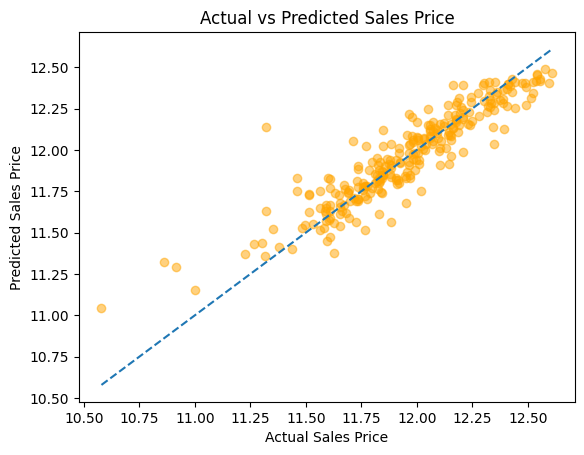

In [89]:
from matplotlib.lines import lineStyles
plt.scatter(y_test, y_pred, alpha = .5, color = "orange")
plt.xlabel("Actual Sales Price")
plt.ylabel("Predicted Sales Price")
plt.title("Actual vs Predicted Sales Price")
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    linestyle = '--')
plt.show()